<a href="https://colab.research.google.com/github/EternalSorrrow/bak/blob/master/nn_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 MNIST CNN - Simple CNN

In [0]:
#@title
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

data = mnist.load_data()

In [0]:
#@title
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
#@title
plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
#@title
x_train, x_test = x_train / 255, x_test / 255 # Normalize data

In [0]:
#@title
x_train = x_train.reshape((-1, 28, 28, 1)) # Reshape data since the Keras expects an array of 3d (not 2d) tensors on input
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
#@title
import numpy as np
np.unique(y_train)

In [0]:
#@title
cat_num = 10

y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num) # Encode integer-expressed classes as a binary vectors

print(y_train.shape, y_test.shape)

In [0]:
#@title
print(y_train[0])

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) # !!! Doesn't work without dropout here

model.add(Flatten()) # ??? Why should we flatten the feature vector?

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#@title
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#@title
batch_size = 128
epochs = 25

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

In [0]:
#@title
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 0.05813348390585916
Test accuracy: 0.985

Nice!

More complex example: CIFAR-10 CNN

In [0]:
#@title
import keras
from keras.datasets import cifar10
import matplotlib.pyplot as plt

data = cifar10.load_data()

In [0]:
#@title
(x_train, y_train), (x_test, y_test) = data
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [0]:
#@title
print(x_train[0][0,0,:])

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
#@title
x_train, x_test = x_train / 255, x_test / 255 # Normalize data

In [0]:
#@title
print(x_train[0][0,0,:])

plt.figure()
plt.imshow(x_train[0], cmap = plt.cm.gray)

In [0]:
#@title
import numpy as np
np.unique(y_train)

In [0]:
#@title
cat_num = 10

y_train = keras.utils.to_categorical(y_train, cat_num)
y_test = keras.utils.to_categorical(y_test, cat_num) # Encode integer-expressed classes as a binary vectors

print(y_train.shape, y_test.shape)

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

#Copy-pasted previous model with the changed input_shape to (32, 23, 3)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
#@title
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#@title
batch_size = 128
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

In [0]:
#@title
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 0.9657731695175171
Test accuracy: 0.6775

Shouldn't expect more from the such primitive model

In [0]:
#@title
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(32, (3,3), activation='relu')) # New convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.15)) #Dropout 0.25 -> 0.15

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(32,32, 3)))
model.add(Conv2D(64, (3,3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2))) # Additional Conv-Conv-MaxPool pattern with 64 filters

model.add(Dropout(0.15))  #One more dropout layer

model.add(Flatten())

model.add(Dense(512, activation='relu')) #128 -> 512 neurons
model.add(Dense(10, activation='softmax'))

In [0]:
#@title
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [0]:
#@title
batch_size = 128
epochs = 100

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

In [0]:
#@title
eval_ = model.evaluate(x_test, y_test, verbose=0) # Score the model
print('Test loss:', eval_[0])
print('Test accuracy:', eval_[1])

Test loss: 1.0367052768707274
Test accuracy: 0.7355

There's still work to do...

Some notices:
- Dropouts have a drastic impact on models's performance. Introduced models didn't work completely without them.
- Straightforward layer adding doesn't yield better result itself, with an any added layer hyperparameter tuning to realize deeper model's potential becomes substantially more tedious. Sometimes it's much easier to build simpler model rather than tune more complex.

MURA

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#!rm -r 'drive/My Drive/MURA-v1.1'
!unzip -q 'drive/My Drive/MURA-v1.1.zip' -d 'drive/My Drive/'
!ls 'drive/My Drive/'

 Books		     MURA-v1.1			 Other	 'Без названия.gsheet'
'Colab Notebooks'    MURA-v1.1.zip		 Public  'Новый документ.gdoc'
 kits_cases_subset   Nemetskie_glagoly_A1.gdoc	 Work


In [7]:
!ls 'drive/My Drive/MURA-v1.1/' ; echo '' ; head -5 'drive/My Drive/MURA-v1.1/train_image_paths.csv' ; echo ''
!head -5 'drive/My Drive/MURA-v1.1/train_labeled_studies.csv'; echo '' ; head -5 'drive/My Drive/MURA-v1.1/valid_image_paths.csv'
!echo '' ; head -240 'drive/My Drive/MURA-v1.1/valid_labeled_studies.csv' | tail -6
!find . -name \*.png | wc -l
!cat  'drive/My Drive/MURA-v1.1/train_image_paths.csv' | wc -l
!cat  'drive/My Drive/MURA-v1.1/valid_image_paths.csv' | wc -l

train		       train_labeled_studies.csv  valid_image_paths.csv
train_image_paths.csv  valid			  valid_labeled_studies.csv

MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image2.png
MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image3.png
MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image1.png
MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/image2.png

MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00002/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00003/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00004/study1_positive/,1
MURA-v1.1/train/XR_SHOULDER/patient00005/study1_positive/,1

MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image1.png
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image2.png
MURA-v1.1/valid/XR_WRIST/patient11185/study1_positive/image3.png
MURA-v1.1/valid/XR_WRIST/patient11185/st

In [9]:
import matplotlib.pyplot as plt
import cv2


img = cv2.imread('drive/My Drive/MURA-v1.1/train/XR_SHOULDER/patient00001/study1_positive/image1.png')
img.shape

(512, 380, 3)

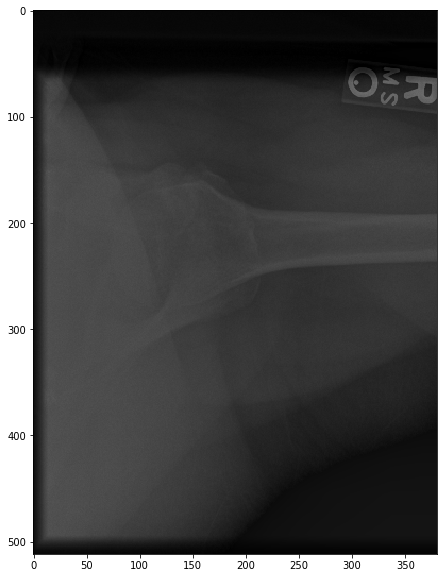

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap = plt.cm.gray)

0.0 0.0


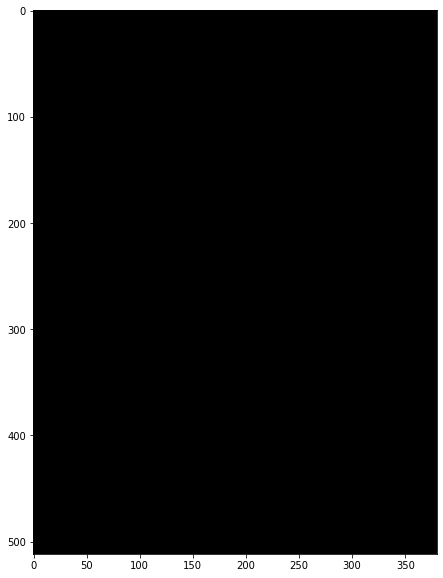

In [11]:
import numpy as np

#Sum of the cross-differences between all 3 pairs of channels to determine, can we use a grayscale image without substantional information loss
diff_map = np.abs(img[:,:,0]-img[:, :, 1])+np.abs(img[:,:,0]-img[:, :, 2]) + np.abs(img[:,:,1]-img[:,:,2])

plt.figure(figsize=(10,10))
plt.imshow(diff_map, cmap = plt.cm.gray)

print(np.mean(diff_map), np.var(diff_map))#All 3 channels are the same, we can reduce the input tensor size 3x by using the grayscale image

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
None image on path: 
XR_SHOULDERpatient00001study1_positive


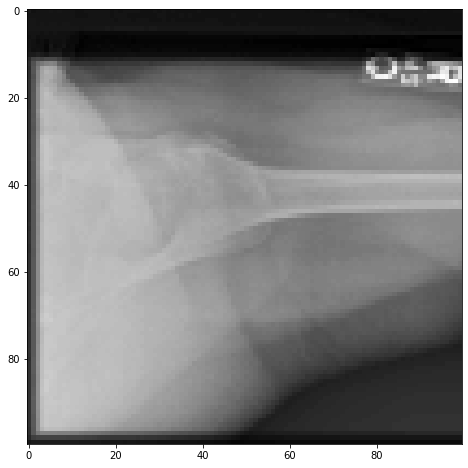

In [53]:
paths = None

image_size = (100, 100)
use_single_channel = True
interpolation = cv2.INTER_AREA

with open('drive/My Drive/MURA-v1.1/train_image_paths.csv', 'r') as file:
  paths = file.read().split('\n')

train_images = []
for i, path in enumerate(paths):
  img = cv2.imread('drive/My Drive/' + path)
  if img is None:
    print('None image on path:', path)
  else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=image_size, interpolation=interpolation)
    path = "".join(path.replace('MURA-v1.1/train/', '').split('/')[:-1])
    train_images.append((path, img))
  if i % 1000 == 0:
    print(i)


print(train_images[0][0])

plt.figure(figsize=(8,8))
plt.imshow(train_images[0][1], cmap = plt.cm.gray)

It's supposed that the 100 x 100 x 1 image still contains enough information to recognise possible traumas/diseases

Total input tensor size reduction is something like ~5 x 5 x 3 = 75 times

0
1000
2000
3000
None image on path: 
XR_WRISTpatient11185study1_positive


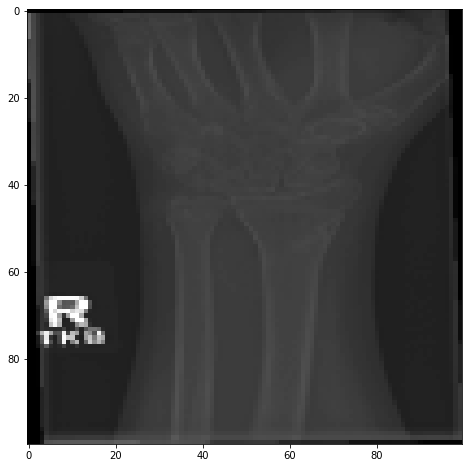

In [54]:
paths = None

image_size = (100, 100)
use_single_channel = True
interpolation = cv2.INTER_AREA

with open('drive/My Drive/MURA-v1.1/valid_image_paths.csv', 'r') as file:
  paths = file.read().split('\n')

valid_images = []
for i, path in enumerate(paths):
  img = cv2.imread('drive/My Drive/' + path)
  if img is None:
    print('None image on path:', path)
  else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, dsize=image_size, interpolation=interpolation)
    path = "".join(path.replace('MURA-v1.1/valid/', '').split('/')[:-1])
    valid_images.append((path, img))
  if i % 1000 == 0:
    print(i)

print(valid_images[0][0])

plt.figure(figsize=(8,8))
plt.imshow(valid_images[0][1], cmap = plt.cm.gray)

In [55]:
with open('drive/My Drive/MURA-v1.1/train_labeled_studies.csv', 'r') as file:
  paths = file.read().split('\n')

if paths[-1] == '':
  paths.pop()

train_label_paths, train_labels = list(map(lambda x: "".join(x.replace('MURA-v1.1/train/', '').split('/')[:-1]), paths)), np.array(list(map(lambda x: x.split(',')[1], paths)))

train_labels = dict(zip(train_label_paths, train_labels))
for item in train_labels.items():
  print(item)
  break

with open('drive/My Drive/MURA-v1.1/valid_labeled_studies.csv', 'r') as file:
  paths = file.read().split('\n')

if paths[-1] == '':
  paths.pop()

valid_label_paths, valid_labels = list(map(lambda x: "".join(x.replace('MURA-v1.1/valid/', '').split('/')[:-1]), paths)), np.array(list(map(lambda x: x.split(',')[1], paths)))
valid_labels = dict(zip(valid_label_paths, valid_labels))
for item in valid_labels.items():
  print(item)
  break

('XR_SHOULDERpatient00001study1_positive', '1')
('XR_WRISTpatient11185study1_positive', '1')


In [56]:
train_labels_array = []
for path, _ in train_images:
  train_labels_array.append(train_labels[path])

valid_labels_array = []
for path, _ in valid_images:
  valid_labels_array.append(valid_labels[path])

print(len(train_images), len(train_labels_array))
print(len(valid_images), len(valid_labels_array))

36808 36808
3197 3197


In [0]:
import keras

t_images = list(map(lambda x: x[1], train_images))
v_images = list(map(lambda x: x[1], valid_images))

t_labels = keras.utils.to_categorical(train_labels_array, 2)
v_labels = keras.utils.to_categorical(valid_labels_array, 2)


In [78]:
print(t_images[0].shape, v_images[0].shape, t_labels[0], v_labels[0])

(100, 100) (100, 100) [0. 1.] [0. 1.]


In [79]:
t_images = np.array(t_images)
v_images = np.array(v_images)

print(t_images.shape, v_images.shape)

t_images = t_images.astype(np.float32) * 1./255
v_images = v_images.astype(np.float32) * 1./255

(36808, 100, 100) (3197, 100, 100)


In [80]:
print(t_images[0].shape)

(100, 100)


In [81]:
t_images = t_images.reshape((-1, 100, 100, 1))
v_images = v_images.reshape((-1, 100, 100, 1))

print(t_images.shape, v_images.shape, t_labels.shape, v_labels.shape)

(36808, 100, 100, 1) (3197, 100, 100, 1) (36808, 2) (3197, 2)


MURA Model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest')

datagen.fit(t_images)

In [0]:
batch_size = 256
epochs = 50

model.fit_generator(datagen.flow(t_images, t_labels, batch_size=batch_size), validation_data=(v_images, v_labels) epochs=epochs)

Notes

Questions:

- Why should I use softmax as a last layer output? Where else the Softmax could be useful? -> Simonsays video
- What is neuron saturation? How does this relate with using the sigmoid functions?
- Why should I use sigmoids as an output functions?
- Gradient vanishing/explosion and it's relation with an activation function type
- How does the dropout layers increase the ANN learning performance? -> Geoffrey Hinton, drawback: longer learning
- What an ANN-building heuristics are exist?
- What are the details of an ANN overfitting?
- How does the convolutional layers learn?
- What is ANN regularization, what problemes does it solve and it's relations with performance.
- What are the factors influencing an ANN performance? Where an attention should be given while trying to implement an ANN to increase it's learning and decisioning speed?
- Kernel striding, its pros and cons
- Capsule Network -> Geoffrey Hinton
- Network in Network
- Transfer Learning
- SGD hyperparameters
- Delta Rule
- Novikoff theorem
- NN: the beginning

AlexNet
- Sparse connections due to the dual-GPU realization
- Local Response Normalization
- Overlapping Pooling
- Extracting 5 image patches and averaging the predictions for all of them to produce the final evaluation
- Applying the PCA on the image intensities and adding multiples of a principal components
- Dividing learning rate by 10 when validation error stopped reducing with the current value with the initial value of 0.01
- Occurring kernel specialization while training on different GPU's
- Dropouts on the first two fully-connected layers

Deconvolutional Network
- Deconv net is a way to visualize a feature map, produced by one of the layers of the CNN
- Maps feature map produced by filter to the original image's color space, showing patterns that excited the layer
- Conventional CNN records the maxima ("switches") positions before the pooling application
- A layer output is then being sended to the DeconvNN, which de-pools the image using switches by placing the input map pixels into switch positions, rectifies them by ReLU and uses transposed filters to reconstruct the input image
- Can be used to "debug" CNN by visualizing the feature maps and filters, giving a knowledge about artifacts and "dead" filters

NN work study:
- A learned net has a hierarchical convolutional layer inference - lower layers are responsible for the lower-level features, such as edges (L1 in the paper), corners (L2), textures/patterns or text (L3), human silhouettes and animal body parts (L4). L5 mostly shows complete objects in different pose variations - higher levels in common are more and more class-specific and are targeting to detect more complex and large-scale features
- Lower layers converge in a few epochs, while higher-level layers require considerable more time to learn
- Lower layers output is very sensitive to rotation/translation/scaling, while higher layers output is much more robust in relation to the last two transformations, resulting in linear value change. CNN's are generally not invariant to the image rotation, except the radial symmetry cases.
- CNNs poorly detect occluded objects

ZF Net
- The used CNN had a similar to the AlexNet structure, except being tightly-connected and using 7 x 7 filters with stride 2 vs 11 x 11 stride 4 filters to keep more local information
- Removing 2 fully-connected or 2 convolutional layers decreased the model precision for a bit, while removing 2 conv and 2 FF layers decreased the precision dramatically. Conclusion: overall depth is important.
- Trained on the one dataset CNN can work as a feature extractor for using on any another dataset by removing the last layer and putting the suitable classifier instead.

VGG Net
- Using only 3 x 3 filters arranged into more layers - that yields more discriminative model with the lower parameters count
- The intuition is that two 3 x 3 filters have the same recepting filed as a one 5 x 5, and three 3 x 3 as a one 7 x 7. And, three 3 x 3 x C filters contain 3 x (3 x 3 x C) = 27C parameters, in comparison to the one 7 x 7 x C = 49C parameter filter, with the included non-linearity.
- Using of the 1 x 1 x C filters projecting image to the same space, but through the composition of a few ReLU's and with no effect on the receptive field
- Doubled batch size, weight decay regularization
- Complex initialization: training less complex structure and using it's last N layers as the first three of the more complex model with the high learning rate to let them change
- The're exist another random initialization techniques that render the metod above obsolete (Glorot & Bengio 2010)
- Multi-scale approaches - the first one is using of 2 image scales - with shortest sides of an image as 256 and 384. Learning on 384 px image was speeded up by training on 256 px images and using pre-trained net to learn on 384 with initially low learning rate (0.001)
- The second multi-scale approach is rescaling the image isotropically to make it's shortest side equal to random number between [Smin, Smax]. Smin was chosen as 256, and Smax as 512. Learning was speeded up by initializing with weights of the pre-trained model on 384 px images.

DenseNet:
- Every layer is connected to every other layer - every layer uses maps from all previous layers as inputs and it's output maps are used in all next layers.
- Dense topology alleviates the vanishing-gradient problem, strengthens feature propagation, encourages feature reuse, substantially reduces the number of parameters